In [30]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [31]:
#we can load the MNIST dataset from Keras datasets
#60.000 training samples and 10.000 images in test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


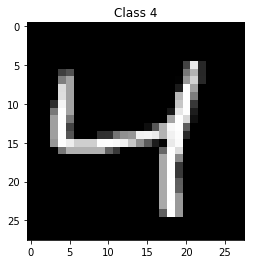

In [32]:
#let's polit a grayscale image with the label
plt.imshow(X_train[2], cmap='gray')
plt.title('Class '+ str(y_train[2]))

#tensorflow can handle format: (batch,height,width,channel)
features_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
features_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

features_train = features_train.astype('float32')
features_test = features_test.astype('float32')

In [33]:
#very similar to min-max normalization: we transform the values
#within the range [0,1] as usual
features_train/=255
features_test/=255

#we have 10 output classes we want to end up with one hot
#encoding as we have seen for the Iris-dataset
# 2 -> [0 0 1 0 0 0 0 0 0 0 ]
targets_train = np_utils.to_categorical(y_train, 10)
targets_test = np_utils.to_categorical(y_test, 10)

In [34]:
#Building the Convolutional Neural Network (CNN)
model = Sequential()

#input is a 28x28 pixels image
#32 is the number of filters - (3,3) size of the filter
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
#normalizing the activations in the previous layer after the convolutional phase
#transformation maintains the mean activation close to 0 std close to 1
#the scale of each dimension remains the same
#reduces running-time of training significantly
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#flattening layer 
model.add(Flatten())
# Fully connected layer
model.add(BatchNormalization())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
#regularization helps to avoid overfitting
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))
#multiclass classification: cross-entropy loss-function with ADAM optimizer
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])


In [36]:
model.fit(features_train, targets_train, batch_size=128, epochs=2, validation_data=(features_test,targets_test), verbose=1)

score = model.evaluate(features_test, targets_test)
print('Test accuracy: %.2f' % score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 669s 11ms/step - loss: 0.1012 - acc: 0.9689 - val_loss: 0.0354 - val_acc: 0.9884
Epoch 2/2
10000/10000 [==============================] - 41s 4ms/step
Test accuracy: 0.99
